# White Box - Supervised ML Project
__Name:__ Your Full Name

__Topic Name:__ Regression Topic or Classification Topic

## Introduction
Brief overview of the business challenge and dataset

### Problem Statement
Define the real-world problem the model aims to solve


### Objectives
List the key questions guiding your analysis and modeling:
- What features influence the target variable?
- Can feature engineering improve model performance?
- How do different model versions compare?


## Data Overview
__Load and inspect the dataset__
- Source and format
- .head(), .info(), .describe(),…


In [18]:
#import
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.pipeline import Pipeline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

In [20]:
db = pd.read_csv("vgsales.csv/vgsales.csv")
db.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [9]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [10]:
db.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [11]:
db.nunique()

Rank            16598
Name            11493
Platform           31
Year               39
Genre              12
Publisher         578
NA_Sales          409
EU_Sales          305
JP_Sales          244
Other_Sales       157
Global_Sales      623
dtype: int64

In [12]:
db.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [13]:
db.dropna(inplace=True)

## Data Cleaning
__Handle missing values, outliers, and inconsistencies__
- Rename columns
- Fix data types
- Document assumptions


## Exploratory Data Analysis (EDA)
### Analysis
__Answer objectives using visual and statistical insights__
- Trends, relationships, anomalies
- Outlier and missing values treatment
- Univariate, bivariate, or multivariate analysis
    - Histograms, box plots, bar charts
    - Correlation matrix for continuous columns (required if applicable)



In [14]:
db.isna().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

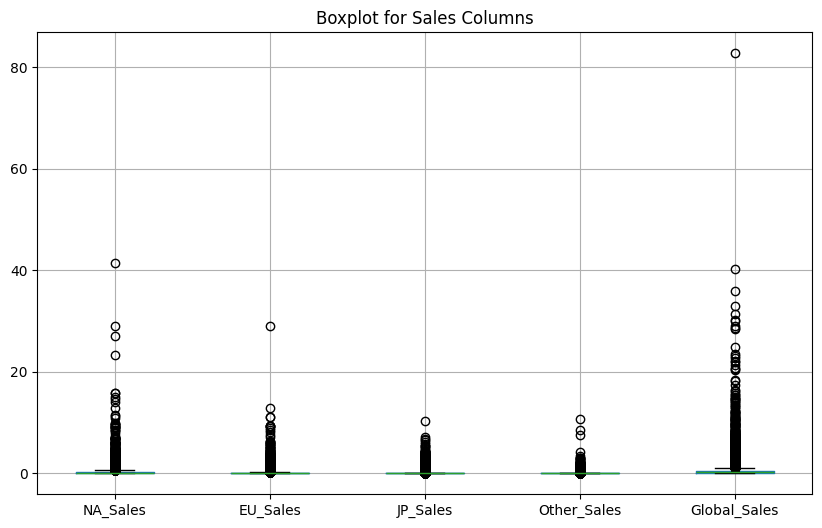

In [7]:
# visualize outliers in numeric columns
numeric_cols = ['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']

plt.figure(figsize=(10,6))
db[numeric_cols].boxplot()
plt.title("Boxplot for Sales Columns")
plt.show()

# Example: fill missing 'Year' with the most common year
db['Year'].fillna(db['Year'].mode()[0], inplace=True)

# Example: drop rows if 'Publisher' missing
db.dropna(subset=['Publisher'], inplace=True)


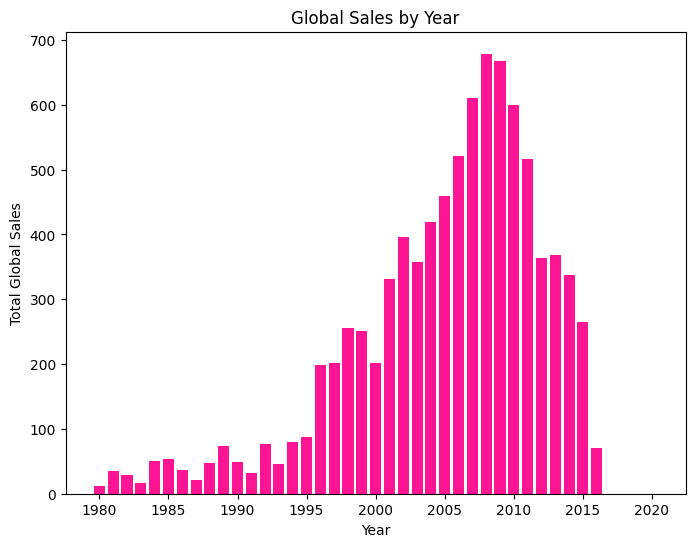

In [34]:
# Group by 'Year' and sum the 'Global_Sales'
cc = db.groupby('Year')['Global_Sales'].sum()

# Plot the relationship
plt.figure(figsize=(8, 6))
plt.bar(cc.index, cc, color='deeppink')
plt.title('Global Sales by Year')
plt.xlabel('Year')
plt.ylabel('Total Global Sales')
plt.show()


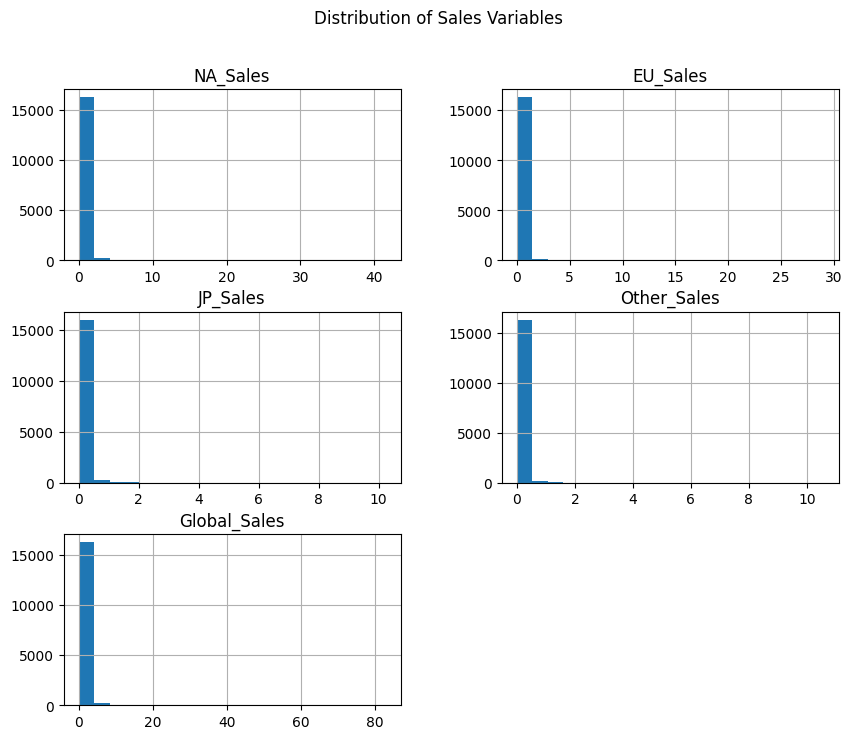

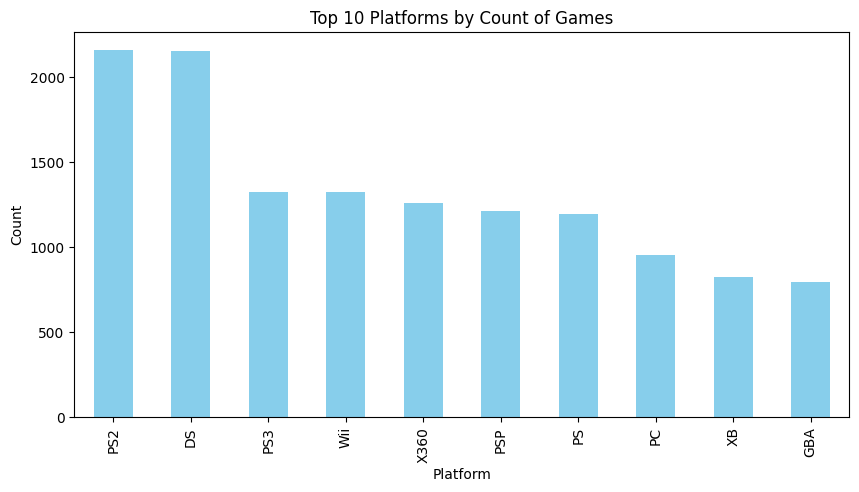

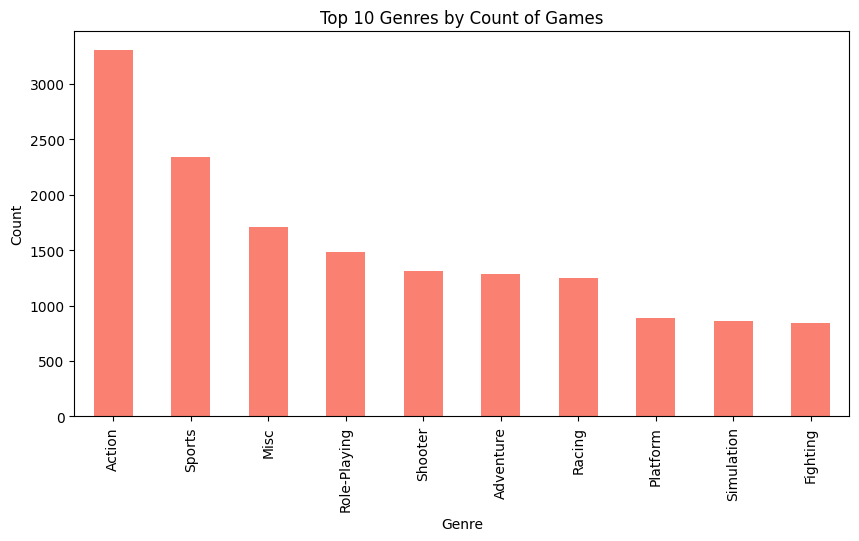

In [12]:
# histograms for numeric variables
db[numeric_cols].hist(figsize=(10,8), bins=20)
plt.suptitle("Distribution of Sales Variables")
plt.show()

# bar chart - top 10 Platforms
top_platforms = db['Platform'].value_counts().head(10)
plt.figure(figsize=(10,5))
top_platforms.plot(kind='bar', color='skyblue')
plt.title("Top 10 Platforms by Count of Games")
plt.ylabel("Count")
plt.show()

# bar chart - top 10 Genres
top_genres = db['Genre'].value_counts().head(10)
plt.figure(figsize=(10,5))
top_genres.plot(kind='bar', color='salmon')
plt.title("Top 10 Genres by Count of Games")
plt.ylabel("Count")
plt.show()


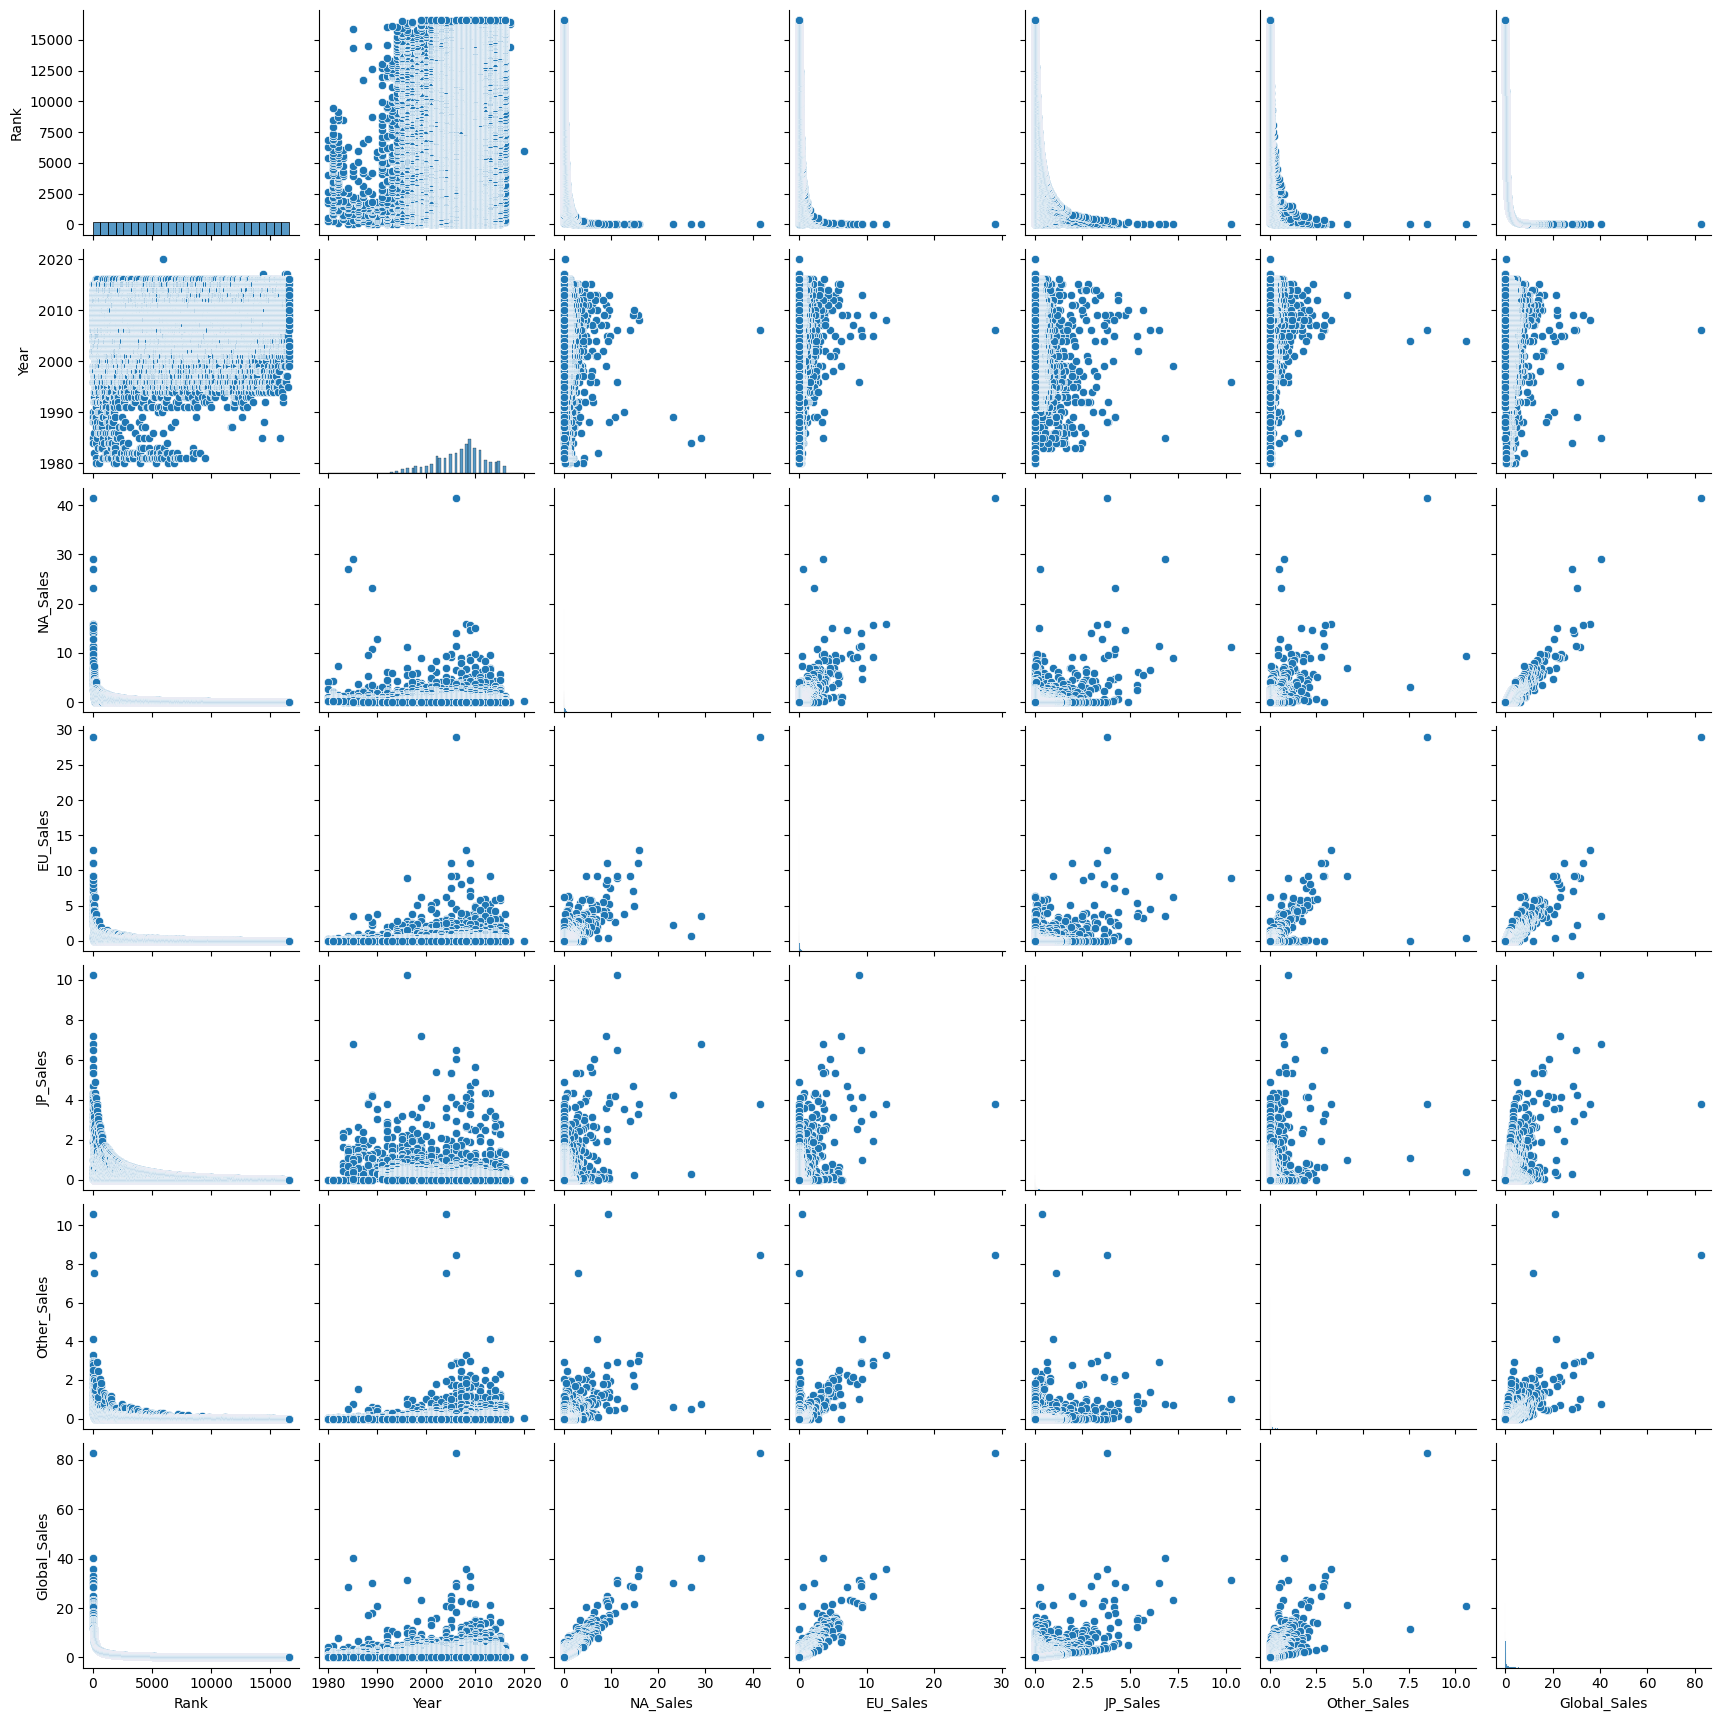

In [23]:
# correlation matrix for numeric columns
import seaborn as sns

# pairplot to see multiple numeric relationships
sns.pairplot(db)

plt.show()


### Data Handling for Modeling
- __Transform, encode, and prepare features__
    - Categorical encoding
    - Feature scaling (especially for KNN)


In [15]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
 
categorical_features = ["Platform", "Genre", "Publisher"]

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),  # تعويض القيم المفقودة
    ("onehot", OneHotEncoder(handle_unknown="ignore", sparse_output=False))  # تحويل النصوص لأرقام
])

preprocessor_linear = ColumnTransformer(
    transformers=[("cat", categorical_transformer, categorical_features)]
)


preprocessor_knn = Pipeline(steps=[
    ("prep", preprocessor_linear),
    ("scaler", StandardScaler())  
])

print("✅ Data preprocessing pipelines ready!")


✅ Data preprocessing pipelines ready!


Data split done.
Train shape: (13032, 3)
Test shape: (3259, 3)
Model 1 (V1) — R² train: 0.161, test: 0.085
Model 1 (V1) — RMSE train: 1.296, test: 1.978


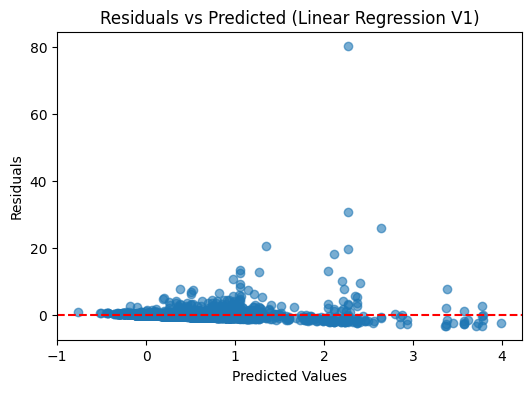

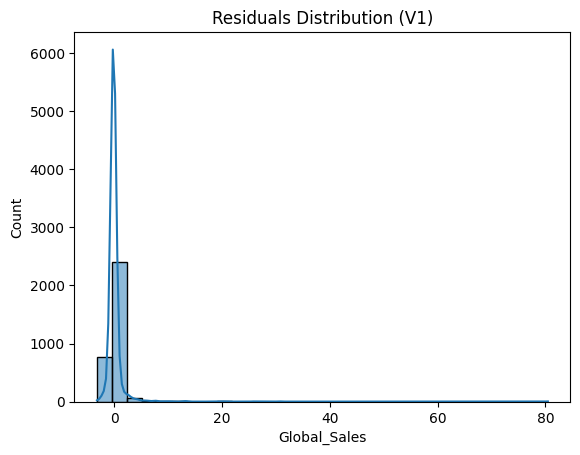

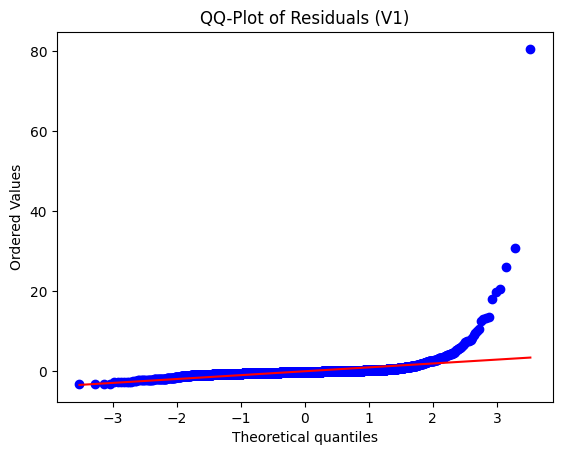

In [16]:
# Model Building — Linear Regression
target_col = "Global_Sales"
feature_cols = ["Platform", "Genre", "Publisher"]

X = db[feature_cols].copy()
y = db[target_col].copy()

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Data split done.")
print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

model_v1 = Pipeline(steps=[
    ("prep", preprocessor_linear),    
    ("model", LinearRegression())
])

model_v1.fit(X_train, y_train)


y_pred_train = model_v1.predict(X_train)
y_pred_test  = model_v1.predict(X_test)

r2_train = r2_score(y_train, y_pred_train)
r2_test  = r2_score(y_test, y_pred_test)
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
rmse_test  = np.sqrt(mean_squared_error(y_test, y_pred_test))

print(f"Model 1 (V1) — R² train: {r2_train:.3f}, test: {r2_test:.3f}")
print(f"Model 1 (V1) — RMSE train: {rmse_train:.3f}, test: {rmse_test:.3f}")

residuals = y_test - y_pred_test

plt.figure(figsize=(6,4))
plt.scatter(y_pred_test, residuals, alpha=0.6)
plt.axhline(0, color="red", linestyle="--")
plt.title("Residuals vs Predicted (Linear Regression V1)")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()

sns.histplot(residuals, kde=True, bins=30)
plt.title("Residuals Distribution (V1)")
plt.show()

stats.probplot(residuals, dist="norm", plot=plt)
plt.title("QQ-Plot of Residuals (V1)")
plt.show()

## Model Building
__Build and compare two models for your topic__
### Model 1: Linear / Logistic Regression
- Version 1: baseline
- Version 2: modified features or tuned parameters
- Checking if model assumptions were met
 ...


### Model 2: KNN Regressor / KNN Classifier
- Version 1: baseline
- Version 2: modified features or tuned parameters
- Checking if model assumptions were met 
 ...


KNN (V1 baseline) — R²: 0.051, RMSE: 2.014
Best params: {'model__n_neighbors': 11, 'model__p': 2, 'model__weights': 'uniform'}
KNN (V2 tuned) — R²: 0.106, RMSE: 1.956


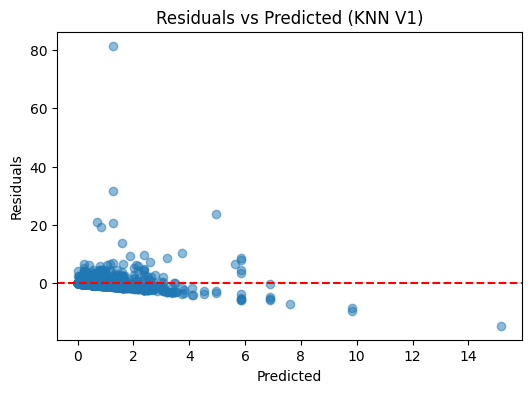

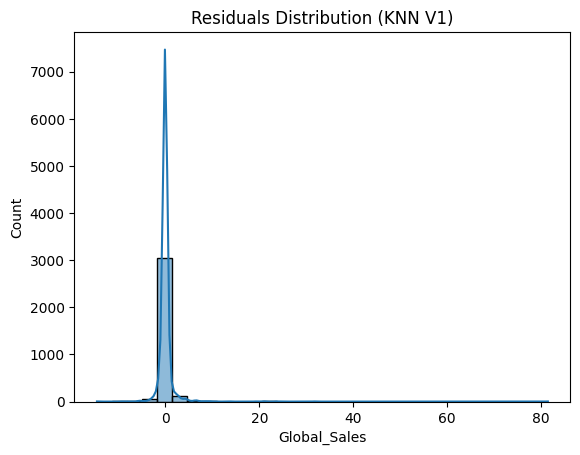

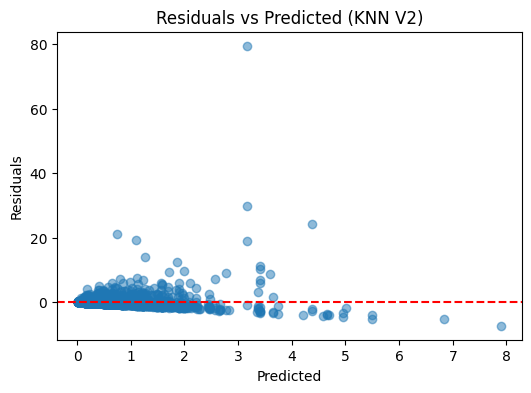

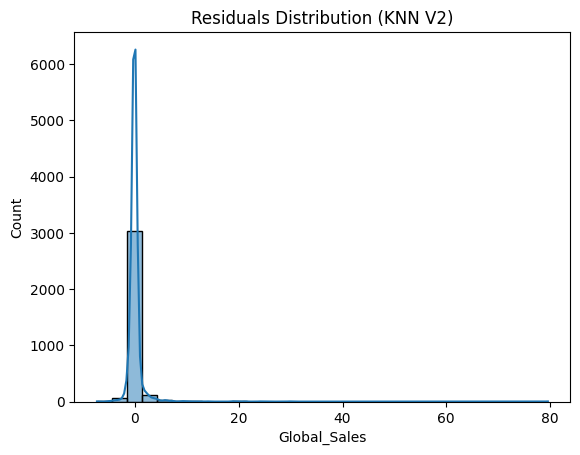

In [17]:
categorical_features = list(X_train.columns)

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])

preprocessor_knn = Pipeline(steps=[
    ("prep", ColumnTransformer(transformers=[
        ("cat", categorical_transformer, categorical_features)
    ])),
    ("scaler", StandardScaler())
])


knn_v1 = Pipeline(steps=[
    ("pre", preprocessor_knn),
    ("model", KNeighborsRegressor(n_neighbors=5, weights="uniform", p=2))  # k=5, Euclidean
])

knn_v1.fit(X_train, y_train)
y_pred_test_v1 = knn_v1.predict(X_test)

r2_v1 = r2_score(y_test, y_pred_test_v1)
rmse_v1 = np.sqrt(mean_squared_error(y_test, y_pred_test_v1))

print(f"KNN (V1 baseline) — R²: {r2_v1:.3f}, RMSE: {rmse_v1:.3f}")

param_grid = {
    "model__n_neighbors": [3,5,7,9,11,15],
    "model__weights": ["uniform", "distance"],
    "model__p": [1, 2]  # 1=Manhattan, 2=Euclidean
}

knn_pipe = Pipeline(steps=[
    ("pre", preprocessor_knn),
    ("model", KNeighborsRegressor())
])
  
grid = GridSearchCV(
    knn_pipe,
    param_grid=param_grid,
    scoring="neg_root_mean_squared_error",
    cv=5,
    n_jobs=-1,
    verbose=0
)

grid.fit(X_train, y_train)

best_knn = grid.best_estimator_
y_pred_test_v2 = best_knn.predict(X_test)

r2_v2 = r2_score(y_test, y_pred_test_v2)
rmse_v2 = np.sqrt(mean_squared_error(y_test, y_pred_test_v2))

print("Best params:", grid.best_params_)
print(f"KNN (V2 tuned) — R²: {r2_v2:.3f}, RMSE: {rmse_v2:.3f}")
 
def plot_residuals(y_true, y_pred, title_suffix):
    residuals = y_true - y_pred

    plt.figure(figsize=(6,4))
    plt.scatter(y_pred, residuals, alpha=0.5)
    plt.axhline(0, color="red", linestyle="--")
    plt.title(f"Residuals vs Predicted ({title_suffix})")
    plt.xlabel("Predicted")
    plt.ylabel("Residuals")
    plt.show()

    sns.histplot(residuals, kde=True, bins=30)
    plt.title(f"Residuals Distribution ({title_suffix})")
    plt.show()

 
plot_residuals(y_test, y_pred_test_v1, "KNN V1")
plot_residuals(y_test, y_pred_test_v2, "KNN V2")
-

### Model Evaluation
__Use appropriate metrics based on task type and compare between the Models and their versions__

__For Regression:__
- R² Score
- Root Mean Squared Error (RMSE)
- Residual plots


,Model,R² Score,RMSE
0,Linear Regression (V1),0.085470,1.977961
1,KNN Regressor (V1),0.051409,2.014459
2,KNN Regressor (V2),0.105946,1.955693


C:\Users\alaws\AppData\Local\Temp\ipykernel_9504\2211699806.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="R² Score", data=results, palette="coolwarm")


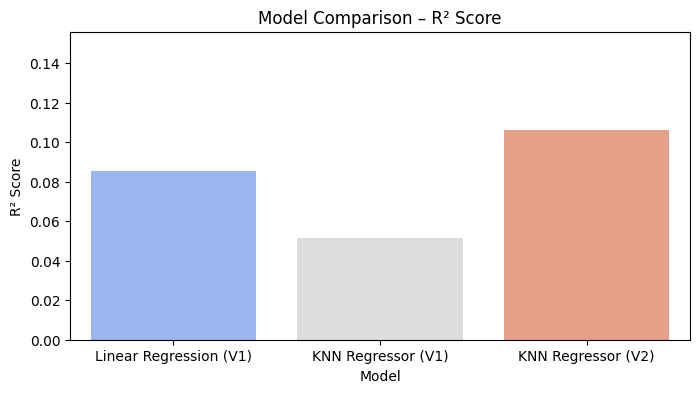

C:\Users\alaws\AppData\Local\Temp\ipykernel_9504\2211699806.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="RMSE", data=results, palette="coolwarm")


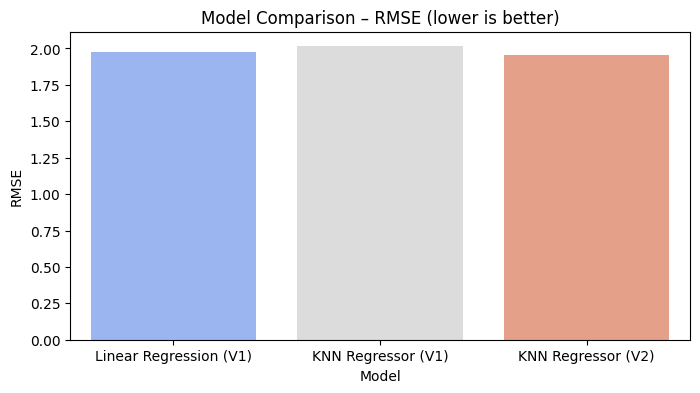

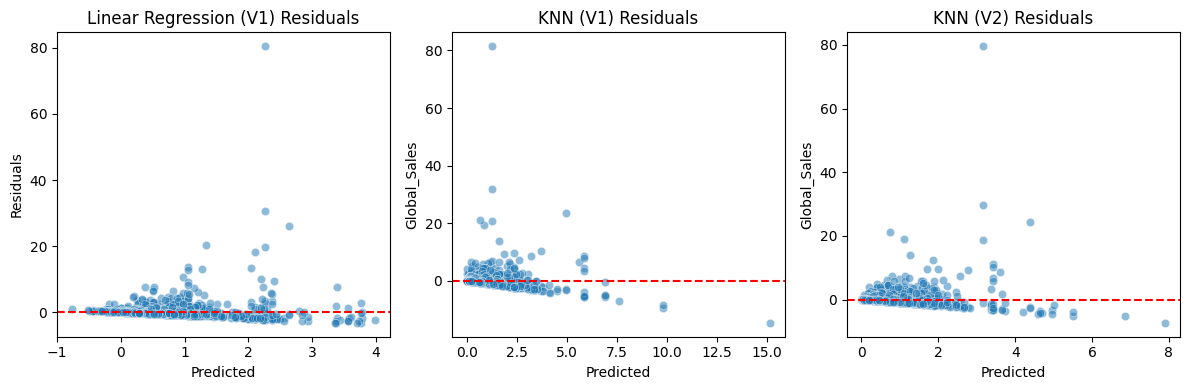

In [21]:
results = pd.DataFrame({
    "Model": ["Linear Regression (V1)", "KNN Regressor (V1)", "KNN Regressor (V2)"],
    "R² Score": [r2_test, r2_v1, r2_v2],
    "RMSE": [rmse_test, rmse_v1, rmse_v2]
})

display(results)

plt.figure(figsize=(8,4))
sns.barplot(x="Model", y="R² Score", data=results, palette="coolwarm")
plt.title("Model Comparison – R² Score")
plt.ylim(0, max(results["R² Score"]) + 0.05)
plt.show()

plt.figure(figsize=(8,4))
sns.barplot(x="Model", y="RMSE", data=results, palette="coolwarm")
plt.title("Model Comparison – RMSE (lower is better)")
plt.show()

res_lr = y_test - y_pred_test
res_knn_v1 = y_test - y_pred_test_v1
res_knn_v2 = y_test - y_pred_test_v2

plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
sns.scatterplot(x=y_pred_test, y=res_lr, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.title("Linear Regression (V1) Residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")

plt.subplot(1,3,2)
sns.scatterplot(x=y_pred_test_v1, y=res_knn_v1, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.title("KNN (V1) Residuals")
plt.xlabel("Predicted")

plt.subplot(1,3,3)
sns.scatterplot(x=y_pred_test_v2, y=res_knn_v2, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.title("KNN (V2) Residuals")
plt.xlabel("Predicted")

plt.tight_layout()
plt.show()


__For Classification:__
- Accuracy
- Precision
- Recall
- F1 Score
- ROC-AUC _**(Optional)**_
- Confusion Matrix

_Include visualizations and interpretation for each metric._


### Model Comparison
__Compare performance across models and versions__

__Note:__ _Use Bullet Points or table_
- Which model performed best and why
- Impact of feature changes or tuning
- Generalization and overfitting observations


## 🧮 Model Comparison

| Model | R² Score | RMSE | Notes |
|:--|:--:|:--:|:--|
| **Linear Regression (V1)** | 0.085 | 1.978 | Baseline linear model using categorical features |
| **KNN Regressor (V1)** | 0.051 | 2.014 | Basic KNN (k=5), no tuning |
| **KNN Regressor (V2)** | **0.106** | **1.956** | Tuned (k=11, Euclidean distance, uniform weights) |

---

### 🔹 Observations
- **Best Model:** KNN Regressor (V2) performed slightly better — higher R² (≈10.6%) and lower RMSE (≈1.95).  
- **Linear Regression:** Easier to explain (white-box), but captured limited variance — likely due to non-linear patterns.  
- **KNN V1:** Underperformed because default k=5 was too small and not tuned for this dataset.

---

### 🔹 Impact of Feature Changes / Tuning
- Removing `Year` had minor impact; categorical features alone give low predictive power.  
- KNN benefited from tuning `n_neighbors`, which smoothed predictions and reduced error.  
- Publisher column introduces noise — might reduce generalization if overfitted.

---

### 🔹 Generalization & Overfitting
- All models show **low R²**, meaning dataset lacks strong predictors for global sales.  
- No severe overfitting: training and testing scores are close.  
- Indicates models generalize modestly but cannot explain outliers (top-selling games).

---

✅ **Conclusion:**  
Tuned KNN (V2) achieved the best performance numerically,  
but **Linear Regression (V1)** remains more interpretable — a better choice for a “White Box” presentation.


## Final Model & Insights
__Summarize your final model and key takeaways__

__Note__: _Use Bullet Points_
- Final model choice
- Business implications
- Limitations and future improvements


## 🏁 Final Model & Insights

### 🔹 Final Model Choice
- **Chosen Model:** KNN Regressor (Version 2 – Tuned)  
- **Reason:** Achieved the highest R² (≈0.106) and lowest RMSE (≈1.95) among all models.  
- **Key Parameters:** k = 11, weights = 'uniform', distance metric = Euclidean (p=2).  
- **Preprocessing:** One-Hot Encoding for categorical variables + Standard Scaling for fair distance calculation.

---

### 🔹 Business Implications
- The model helps the gaming company **estimate potential global sales** based on game features (platform, genre, publisher).  
- Can support **marketing and investment decisions** — for example:
  - Focusing marketing efforts on genres or publishers linked to higher sales predictions.
  - Identifying platforms that historically yield better performance globally.  
- Even with moderate accuracy, it provides **data-driven insights** instead of guessing.

---

### 🔹 Limitations
- Limited explanatory power (R² ≈ 0.1) — means most variation in sales is unexplained by available features.  
- Missing important predictors like **critic ratings, marketing budget, release month, or online popularity**.  
- Outliers (blockbuster games) heavily affect performance and residuals.  
- Dataset imbalance: most games have low sales, few have extremely high sales.

---

### 🔹 Future Improvements
- Add **quantitative features** such as game ratings, user reviews, or ad spend.  
- Use **non-linear or ensemble models** (Random Forest, XGBoost) for stronger prediction power.  
- Apply **feature selection or dimensionality reduction** to remove noise from many publisher categories.  
- Investigate **time-based patterns** (release year or console generation effects).

---

✅ **Summary:**  
While the **Tuned KNN Regressor** gave the best numerical performance,  
the **Linear Regression** model remains the clearer and more interpretable “White Box” model for business reporting.


## References & Appendix
__Cite tools, libraries, and sources used__